Goals:
automate the process of optimizing w and b using gradient descent

In [3]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mpstyle')
from lab_utils_uni import plt_house_x,plt_contour_wgrad,plt_divergence,plt_gradients

OSError: './deeplearning.mpstyle' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

Problem Statement:
we will use same data as before and keep it small for better understanding

In [4]:
x_train=np.array([1.2,2.0])
y_train=np.array([300.0,500.0])


Compute cost:


In [5]:
def compute_cost(x,y,w,b):
    m=len(x)
    cost=0
    for i in range(m):
        f_wb=w*x[i]+b
        cost=cost+(f_wb -y[i])**2
    total_cost=cost/(2*m)
    return total_cost

compute gradient_descent:


In [6]:
def compute_gradient(x,y,w,b):
    m=len(x)
    dj_dw=0
    dj_db=0
    for i in range(m):
        f_wb=w*x[i]+b
        dj_dw_i=(f_wb -y[i])*x[i]
        dj_db_i=f_wb-y[i]
        dj_dw+=dj_dw_i
        dj_db+=dj_db_i
    dj_dw/=m
    dj_db/=m
    
    return dj_dw,dj_db    

let's use our compute_graddient to find and plot some partial derivatives of our cost function relative to one of the parameters,w0

In [7]:
plt_gradients(x_train,y_train,compute_cost,compute_gradient)

NameError: name 'plt_gradients' is not defined

now gradient descent can be computed

In [8]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    J_history=[]
    p_history=[]
    w=w_in
    b=b_in
    for i in range(num_iters):
        dj_dw,dj_db=gradient_function(x,y,w,b)
        b=b-alpha*dj_db
        w=w-alpha*dj_dw

        if i<1000000:
            J_history.append(cost_function(x,y,w,b))
            p_history.append([w,b])
        if i%math.ceil(num_iters/10)==0:
            print(f"Iteration{i:4}:Cost{J_history[-1]:0.2e}",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
    return w,b,J_history,p_history

In [9]:
w_init = 0
b_init = 0
iterations = 10000
tmp_alpha = 1.0e-2
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration   0:Cost7.89e+04 dj_dw: -6.800e+02, dj_db: -4.000e+02   w:  6.800e+00, b: 4.00000e+00
Iteration1000:Cost1.50e+02 dj_dw: -1.854e+00, dj_db:  3.101e+00   w:  2.074e+02, b: 7.12139e+01
Iteration2000:Cost6.27e+01 dj_dw: -1.199e+00, dj_db:  2.006e+00   w:  2.225e+02, b: 4.60807e+01
Iteration3000:Cost2.63e+01 dj_dw: -7.761e-01, dj_db:  1.298e+00   w:  2.322e+02, b: 2.98177e+01
Iteration4000:Cost1.10e+01 dj_dw: -5.022e-01, dj_db:  8.400e-01   w:  2.385e+02, b: 1.92942e+01
Iteration5000:Cost4.60e+00 dj_dw: -3.249e-01, dj_db:  5.436e-01   w:  2.425e+02, b: 1.24848e+01
Iteration6000:Cost1.93e+00 dj_dw: -2.103e-01, dj_db:  3.517e-01   w:  2.452e+02, b: 8.07861e+00
Iteration7000:Cost8.07e-01 dj_dw: -1.361e-01, dj_db:  2.276e-01   w:  2.469e+02, b: 5.22746e+00
Iteration8000:Cost3.38e-01 dj_dw: -8.804e-02, dj_db:  1.473e-01   w:  2.480e+02, b: 3.38256e+00
Iteration9000:Cost1.41e-01 dj_dw: -5.697e-02, dj_db:  9.530e-02   w:  2.487e+02, b: 2.18877e+00
(w,b) found by gradient descent: (249.15

cost versus iterations of gradient descent

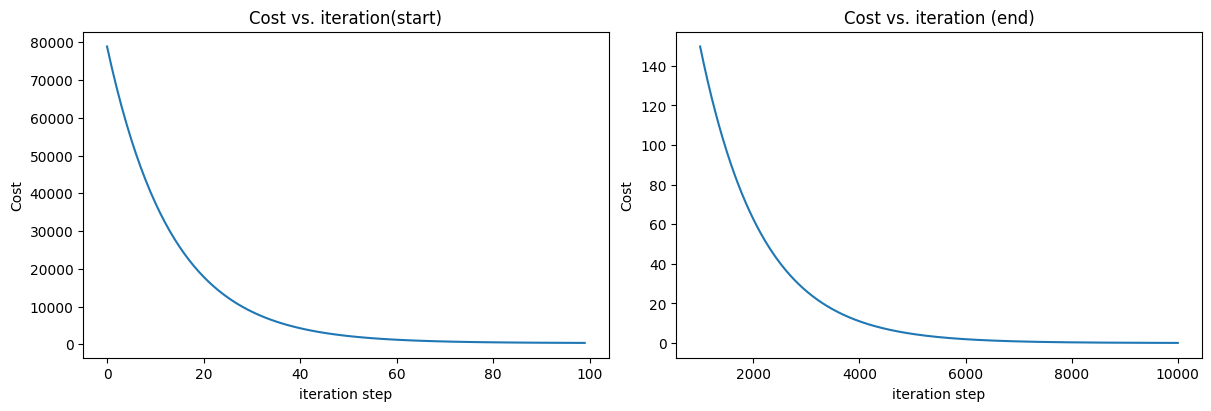

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

Predictions:

In [11]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 250.6 Thousand dollars
1200 sqft house prediction 300.4 Thousand dollars
2000 sqft house prediction 499.7 Thousand dollars


plotiing


NameError: name 'plt_contour_wgrad' is not defined

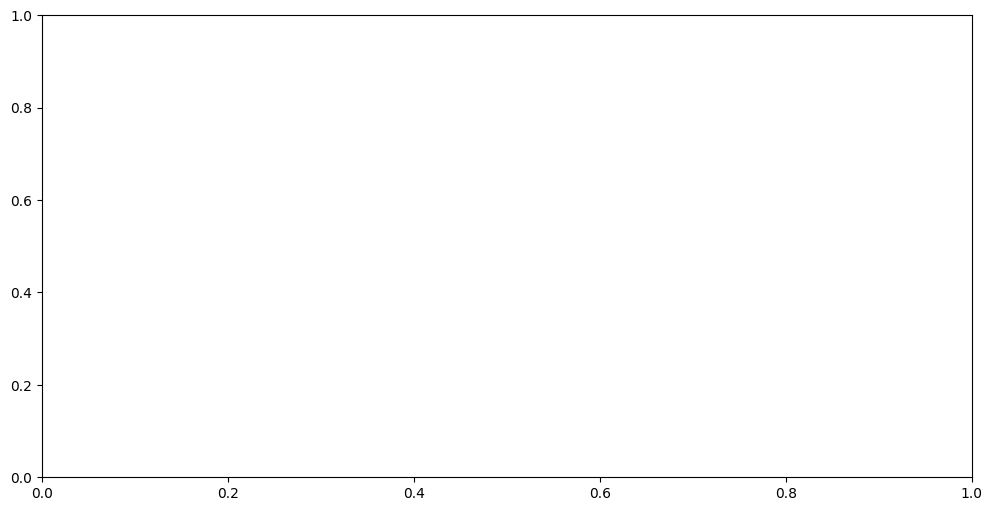

In [12]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
plt_contour_wgrad(x_train,y_train,p_hist,ax)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)

increasing learning rate

In [ ]:
w_init = 0
b_init = 0
iterations = 10
tmp_alpha = 8.0e-1
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)

In [2]:
plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()

NameError: name 'plt_divergence' is not defined